#Importing Required Libraries

In [ ]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#Defining Autoencoder

In [ ]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

#Loading the dataset

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

#Preparing the data

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


#Training the Autoencoder

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 4ms/step - loss: 0.2783 - accuracy: 0.0109 - val_loss: 0.1919 - val_accuracy: 0.0102
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1728 - accuracy: 0.0097 - val_loss: 0.1549 - val_accuracy: 0.0102
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1453 - accuracy: 0.0105 - val_loss: 0.1337 - val_accuracy: 0.0114
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1285 - accuracy: 0.0110 - val_loss: 0.1214 - val_accuracy: 0.0113
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1184 - accuracy: 0.0117 - val_loss: 0.1131 - val_accuracy: 0.0131
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1111 - accuracy: 0.0120 - val_loss: 0.1069 - val_accuracy: 0.0131
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1058 - accuracy: 0.0115 - val_loss: 0.1024 - val_accuracy: 0.0130
Epoch 

#Generating Test Results

In [ ]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

#Visualizing Reconstructed Images

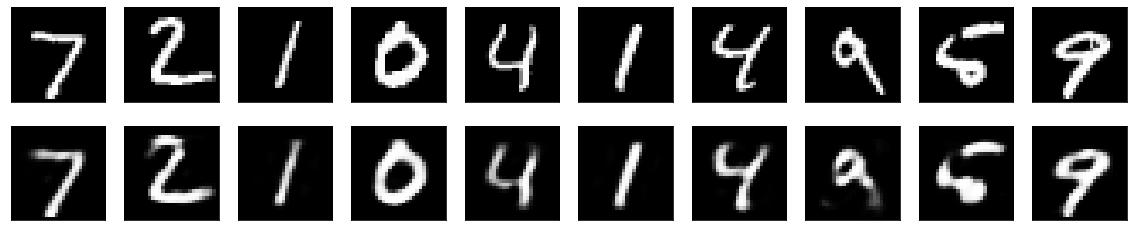

In [ ]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Deep Autoencoder

In [ ]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2483 - accuracy: 0.0120 - val_loss: 0.1687 - val_accuracy: 0.0181
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1537 - accuracy: 0.0129 - val_loss: 0.1414 - val_accuracy: 0.0093
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1352 - accuracy: 0.0125 - val_loss: 0.1280 - val_accuracy: 0.0121
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1260 - accuracy: 0.0124 - val_loss: 0.1217 - val_accuracy: 0.0100
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1206 - accuracy: 0.0113 - val_loss: 0.1168 - val_accuracy: 0.0141
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1163 - accuracy: 0.0115 - val_loss: 0.1132 - val_accuracy: 0.0120
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1127 - accuracy: 0.0119 - val_loss: 0.1096 - val_accuracy: 0.0122

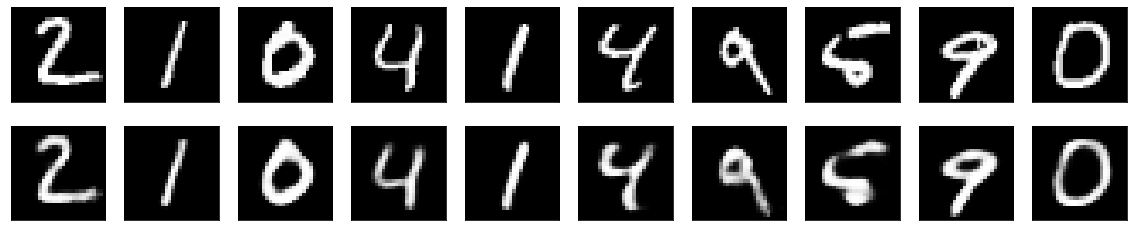

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#Convolutional Autoencoder

In [ ]:
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import MaxPooling2D, UpSampling2D
from keras.models import Model
from keras.datasets.mnist import load_data
from numpy import reshape
import matplotlib.pyplot as plt

In [ ]:
(xtrain, _), (xtest, _) = load_data()

xtrain = xtrain.astype('float32') / 255
xtest = xtest.astype('float32') / 255
print(xtrain.shape, xtest.shape) 

x_train = reshape(xtrain, (len(xtrain), 28, 28, 1)) 
x_test = reshape(xtest, (len(xtest), 28, 28, 1)) 
print(x_train.shape, x_test.shape) 

input_img = Input(shape=(28, 28, 1))

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
enc_conv1 = Conv2D(12, (3, 3), activation='relu', padding='same')(input_img)
enc_pool1 = MaxPooling2D((2, 2), padding='same')(enc_conv1)
enc_conv2 = Conv2D(8, (4, 4), activation='relu', padding='same')(enc_pool1)
enc_ouput = MaxPooling2D((4, 4), padding='same')(enc_conv2)

dec_conv2 = Conv2D(8, (4, 4), activation='relu', padding='same')(enc_ouput)
dec_upsample2 = UpSampling2D((4, 4))(dec_conv2)
dec_conv3 = Conv2D(12, (3, 3), activation='relu')(dec_upsample2)
dec_upsample3 = UpSampling2D((2, 2))(dec_conv3)
dec_output = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(dec_upsample3)

autoencoder = Model(input_img, dec_output)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')
autoencoder.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 12)        120       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1544      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           1032      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 16, 16, 8)       

In [ ]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, shuffle=True)

Epoch 1/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2130
Epoch 2/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1689
Epoch 3/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1584
Epoch 4/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1519
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1472
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1435
Epoch 7/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1408
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1386
Epoch 9/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1368
Epoch 10/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1354
Epoch 11/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1340
Epoch 12/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1329
Epoch 13/100


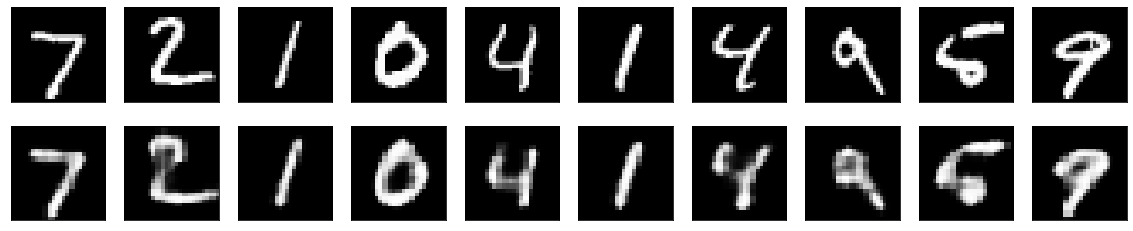

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
 plt.gray()
 ax = plt.subplot(2, n, i+1)
 plt.imshow(x_test[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
 
 ax = plt.subplot(2, n, i +1+n)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 ax.get_xaxis().set_visible(False)
 ax.get_yaxis().set_visible(False)
plt.show()